  2%|▏         | 21/1000 [00:00<00:04, 203.16it/s]

100%|██████████| 1000/1000 [00:04<00:00, 202.32it/s]


Operation: top_k_top_p_filtering, Batch Size: 1, Avg Time: 4.89ms, Min Time: 4.83ms, Max Time: 5.10ms


100%|██████████| 1000/1000 [00:07<00:00, 135.83it/s]


Operation: top_k_top_p_filtering, Batch Size: 2, Avg Time: 7.31ms, Min Time: 6.31ms, Max Time: 8.53ms


100%|██████████| 1000/1000 [00:07<00:00, 127.15it/s]


Operation: top_k_top_p_filtering, Batch Size: 4, Avg Time: 7.77ms, Min Time: 6.21ms, Max Time: 9.70ms


100%|██████████| 1000/1000 [00:07<00:00, 140.71it/s]


Operation: top_k_top_p_filtering, Batch Size: 8, Avg Time: 7.00ms, Min Time: 6.14ms, Max Time: 8.45ms


100%|██████████| 1000/1000 [00:08<00:00, 121.58it/s]


Operation: top_k_top_p_filtering, Batch Size: 16, Avg Time: 8.10ms, Min Time: 7.59ms, Max Time: 8.85ms


100%|██████████| 1000/1000 [00:14<00:00, 70.68it/s]


Operation: top_k_top_p_filtering, Batch Size: 32, Avg Time: 13.98ms, Min Time: 11.55ms, Max Time: 15.67ms


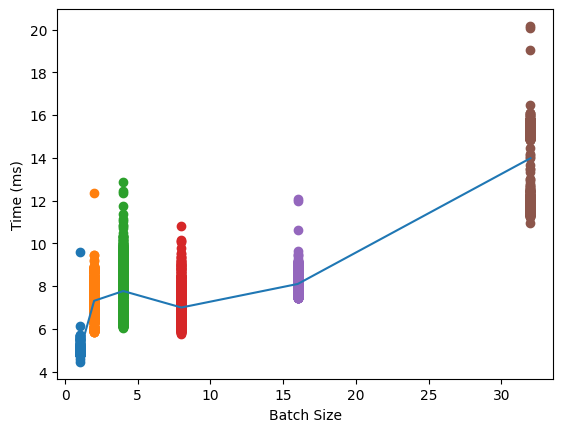

In [51]:
import torch
from transformers.generation.utils import top_k_top_p_filtering

batch_sizes = [1, 2, 4, 8, 16, 32]
ops = [top_k_top_p_filtering]

input_tensor_shape = (32, 128 * 1024)
in_t = torch.randn(input_tensor_shape)
# Apply softmax to get probabilities
in_t = torch.nn.functional.softmax(in_t, dim=-1)

# Iterate over batch size and then over ops 
# to run 1000 times and calculate avg, min and max time taken
from time import time
import matplotlib.pyplot as plt
from tqdm import tqdm
# create dictionary for each operation and batch size to store avg times
avg_times = {op.__name__: {batch_size: [] for batch_size in batch_sizes} for op in ops}
for op in ops:
    for batch_size in batch_sizes:
        times = []
        for _ in tqdm(range(1000)):
            sliced_input = in_t[:batch_size]
            start = time()
            if op.__name__ == 'top_k_top_p_filtering':
                op(sliced_input, top_k=32, top_p=0.95)
            else:
                op(sliced_input, dim=-1)
            end = time()
            times.append((end - start)*1000)
        # print results with 2 decimal places
        # plot times as points for each batch size and operation
        plt.scatter([batch_size] * len(times), times, label=op.__name__)
        # calculate avg after removing outliers and print
        # remove top and bottom 5%
        times.sort()
        times = times[len(times)//20:-len(times)//20]
        
        print(f"Operation: {op.__name__}, Batch Size: {batch_size}, Avg Time: {sum(times) / len(times):.2f}ms, Min Time: {min(times):.2f}ms, Max Time: {max(times):.2f}ms")
        avg_times[op.__name__][batch_size] = sum(times) / len(times)
        # plt.plot(batch_sizes, times, label=op.__name__)
        # plt.legend()

# plot avg times with legend with name of axis and exact values for x axis
# add legend for each operation and names for x and y axis
plt.xlabel('Batch Size')
plt.ylabel('Time (ms)')
# annotate ops in legend with their names and respective colors
for op in ops:
    plt.plot(batch_sizes, [avg_times[op.__name__][batch_size] for batch_size in batch_sizes], label=op.__name__)
    # show legends for each operation and respective color 
    # plt.legend()
# plt.plot(batch_sizes, [avg_times[op.__name__][batch_size] for op in ops for batch_size in batch_sizes], label=op.__name__)
# print table of avg times for each operation and batch size
plt.show()
# print(avg_times)
# print(avg_times['top_k_top_p_filtering'])
# print(avg_times['torch.argmax'])
# print(avg_times['torch.argmax'][1])
# print as table with batch size as rows and operations as columns
# print('Batch Size', end='\t')
# for op in ops:
#     print(op.__name__, end='\t')
# print()
# for batch_size in batch_sizes:
#     print(batch_size, end='\t')
#     for op in ops:
#         print(avg_times[op.__name__][batch_size], end='\t')
#     print()

